# Predicting Popularity 

## Business Understanding 

I have been hired by Apple Music to help improve their recommendation system to keep users engaged on their streaming service. Apple Music wants to make their   

In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import surprise
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('final_df.csv', index_col=0)

In [3]:
df

,track_id,track_name,track_popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,artist_id,followers,genres,artist_name,artist_popularity
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,1922-02-22,0.645,0.44500,0,-13.338,...,0.744000,0.1510,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
1,0PH9AACae1f957JAavhOl2,Lazy Boi,0,157333,0,1922-02-22,0.298,0.46000,1,-18.645,...,0.856000,0.4360,0.402,87.921,4,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
2,2SiNuAZ6jIU9xhClRKXcST,Sketch,0,87040,0,1922-02-22,0.634,0.00399,5,-29.973,...,0.919000,0.1050,0.396,79.895,4,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
3,4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,1922-02-22,0.657,0.32500,10,-14.319,...,0.856000,0.0931,0.105,81.944,5,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
4,598LlBn6jpEpVbLjmZPsYV,Graphite,0,104400,0,1922-02-22,0.644,0.68400,7,-8.247,...,0.802000,0.0847,0.138,100.031,4,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470033,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,2020-02-25,0.528,0.67300,4,-3.639,...,0.000000,0.0989,0.297,130.066,4,5VGgFE9nPgMfEnYiPT5J2B,929.0,chinese viral pop,芝麻,36
470034,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,2020-10-30,0.609,0.01720,8,-28.573,...,0.973000,0.1080,0.890,68.619,4,7vgGpuiXdNlCmc994PlMlz,23.0,instrumental lullaby,Laureen Conrad,52
470035,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,2020-03-20,0.562,0.03310,1,-25.551,...,0.961000,0.1110,0.386,63.696,3,4MxqhahGRT4BPz1PilXGeu,91.0,instrumental lullaby,Gregory Oberle,55
470036,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,2020-09-26,0.560,0.51800,0,-7.471,...,0.000000,0.0648,0.211,131.896,4,1QLBXKM5GCpyQQSVMNZqrZ,896.0,chinese viral pop,阿YueYue,38


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470038 entries, 0 to 470037
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   track_id           470038 non-null  object 
 1   track_name         470038 non-null  object 
 2   track_popularity   470038 non-null  int64  
 3   duration_ms        470038 non-null  int64  
 4   explicit           470038 non-null  int64  
 5   release_date       470038 non-null  object 
 6   danceability       470038 non-null  float64
 7   energy             470038 non-null  float64
 8   key                470038 non-null  int64  
 9   loudness           470038 non-null  float64
 10  mode               470038 non-null  int64  
 11  speechiness        470038 non-null  float64
 12  acousticness       470038 non-null  float64
 13  instrumentalness   470038 non-null  float64
 14  liveness           470038 non-null  float64
 15  valence            470038 non-null  float64
 16  te

In [10]:
x_cols = ['danceability', 'energy', 'loudness', 'key', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']

Separating my columns into X and y so that I can run a train_test_split for the models I will use to predict track popularity.

In [11]:
X = df[x_cols]

In [12]:
y = df['track_popularity'] >= 50

The following code is from lesson 5.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [17]:
scaler=StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
num_transformer = StandardScaler()

In [24]:
preprocessor = ColumnTransformer([
    ('nums', num_transformer, x_cols)
])

## Modeling Phase 

### Decision Tree

The following code is from lesson 17. 

In [25]:
clf_dt = Pipeline(steps = [
    ('preprocessor', preprocessor), 
    ('tree', DecisionTreeClassifier(random_state=42, max_depth=15))
])

clf_dt.fit(X_train[x_cols], y_train)

train_preds = clf_dt.predict(X_train[x_cols])
test_preds = clf_dt.predict(X_test[x_cols])

train_probas = clf_dt.predict_proba(X_train[x_cols])[:,1]
test_probas = clf_dt.predict_proba(X_test[x_cols])[:,1]

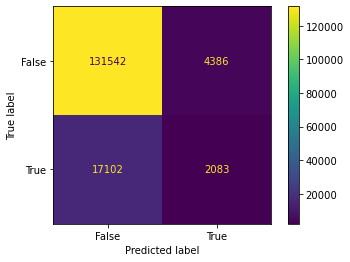

In [27]:
plot_confusion_matrix(clf_dt, X_test[x_cols], y_test)

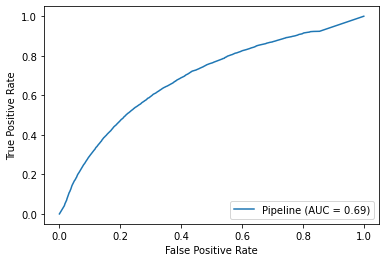

In [29]:
plot_roc_curve(clf_dt, X_test[x_cols], y_test)

In [30]:
print(f"Train F1: {f1_score(y_train, train_preds):.4f}")
print(f"Train Precision: {precision_score(y_train, train_preds):.4f}")
print(f"Train ROC-AUC: {roc_auc_score(y_train, train_preds):.4f}")
print(f"Test F1: {f1_score(y_test, test_preds):.4f}")
print(f"Test Precision: {precision_score(y_test, test_preds):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, test_preds):.4f}")

Train F1: 0.3926
Train Precision: 0.8063
Train ROC-AUC: 0.6253
Test F1: 0.1624
Test Precision: 0.3220
Test ROC-AUC: 0.5382


### Logistic Regression

The following code is from lesson 17. 

In [32]:
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('logreg', LogisticRegression())
])

clf_lr.fit(X_train[x_cols], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nums', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'key', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('logreg', LogisticRegression())])

In [34]:
def evaluate(model, Xtr, Xte, ytr, yte):
    train_preds = model.predict(Xtr)
    test_preds = model.predict(Xte)

    train_probas = model.predict_proba(Xtr)[:,1]
    test_probas = model.predict_proba(Xte)[:,1]
    
    plot_confusion_matrix(model, Xte, yte)
    
    plot_roc_curve(model, Xte, yte)
    
    print(f"Train F1: {f1_score(ytr, train_preds):.4f}")
    print(f"Train Precision: {precision_score(ytr, train_preds):.4f}")
    print(f"Train ROC-AUC: {roc_auc_score(ytr, train_preds):.4f}")
    print(f"Test F1: {f1_score(yte, test_preds):.4f}")
    print(f"Test Precision: {precision_score(yte, test_preds):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(yte, test_preds):.4f}")

Train F1: 0.0111
Train Precision: 0.5477
Train ROC-AUC: 0.5025
Test F1: 0.0093
Test Precision: 0.5590
Test ROC-AUC: 0.5021


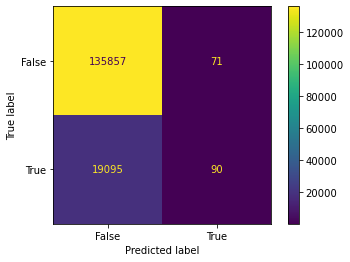

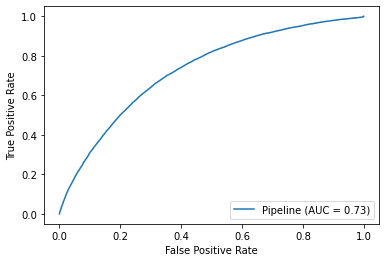

In [37]:
evaluate(clf_lr, X_train[x_cols], X_test[x_cols], y_train, y_test)

### KNN Model

The following code is from lesson 12. 

In [38]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_sc, y_train)

print(f"Train Accuracy: {knn.score(X_train_sc, y_train)}")
print(f"Test Accuracy: {knn.score(X_test_sc, y_test)}")

Train Accuracy: 0.8908184488370247
Test Accuracy: 0.8627194367976895


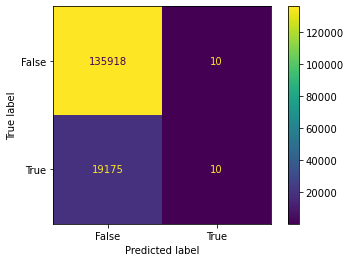

In [42]:
plot_confusion_matrix(knn, X_test[x_cols], y_test)

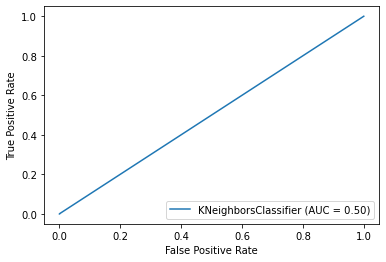

In [43]:
plot_roc_curve(knn, X_test[x_cols], y_test)

With KNN being my best model in terms of Accuracy, I am going to continue to improve the KNN going forward in this project.